In [1]:
import matplotlib.pyplot as plt

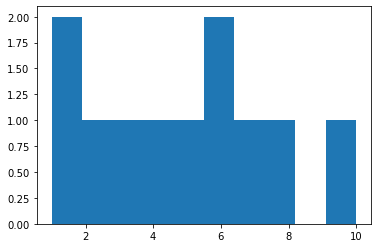

In [2]:
# 간단한 히스토그램 그려보기
plt.hist([1,1,2,3,4,5,6,6,7,8,10])
plt.show()

임의의 수를 뽑는 랜덤 함수를 활용해 간단한 주사위 시뮬레이션 만들기

주사위 시뮬레이션은 다음과 같은 과정으로 진행

- 주사위를 굴린다.
- 나온 결과를 기록한다.
- 1,2 과정을 n번 반복한다.
- 주사위의 눈이 나온 횟수를 히스토그램으로 그린다.

In [4]:
import random

In [5]:
# 주사위 굴리는 것을 시뮬레이션 하기위해 random 모듈의 randint() 함수를 사용
print(random.randint(1,6))

2


In [7]:
# 주사위를 여러 번 굴리는 상황을 시뮬레이션 하기 위해 for문 사용, 
# dice라는 이름의 리스트에 순서대로 저장 

dice = []
for i in range(5):
    dice.append(random.randint(1,6))

print(dice)

[1, 5, 5, 2, 4]


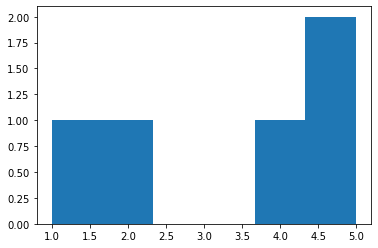

In [8]:
# 위 ㅕㄹ과를 히스토그램으로 나타내기
plt.hist(dice, bins=6)
plt.show()

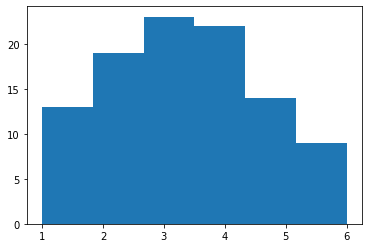

In [10]:
# 주사위 100번 굴린 효과 시뮬레이션하기
dice = []
for i in range(100):
    dice.append(random.randint(1,6))
    
plt.hist(dice, bins=6)
plt.show()

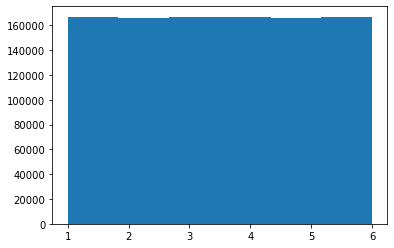

In [13]:
# 주사위 백만 번 굴려보기
dice = []
for i in range(1000000):
    dice.append(random.randint(1,6))

plt.hist(dice, bins=6)
plt.show()

## 기온 데이터를 히스토그램으로 표현하기

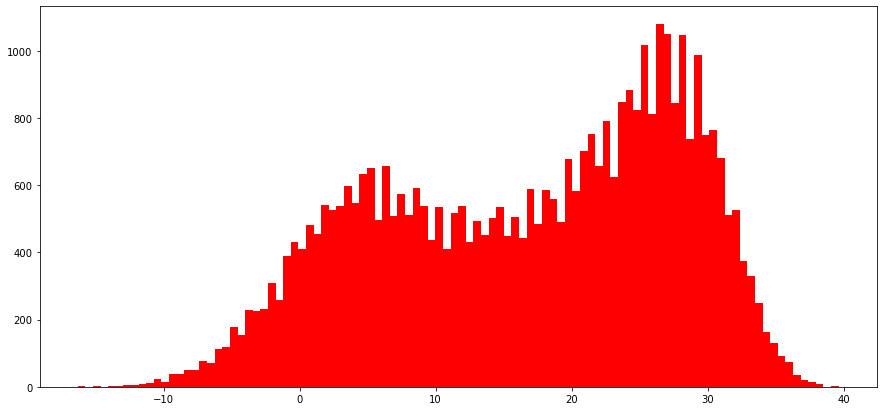

In [31]:
# 1907년 부터 2018년 까지 수집되노 서울의 기온 데이터를 히스토그램으로 나타내기
import csv

f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))

plt.figure(figsize=(15,7))
plt.hist(result, bins=100, color='r')  # 히스토그램으로 나타내기
plt.show()

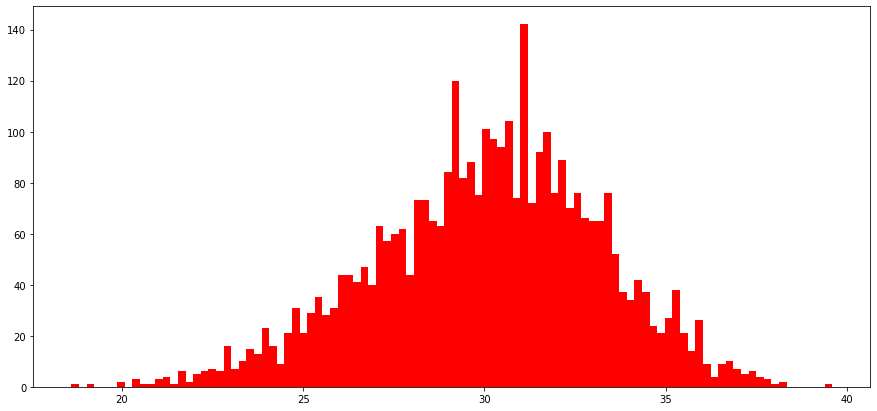

In [32]:
# 8월 기온 데이터만 뽑아서 히스토그램으로 나타내기
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)
aug = [] # 8월 최고 기온 값을 저장할 aug 리스트 생성

for row in data:
    month = row[0].split('-')[1] # -로 구분된 값 중 2번째 값을 month에 저장
    if row[-1] != '':
        if month =='08':   # 8월 이라면
            aug.append(float(row[-1]))   # aug 리스트에 최고 기온 값 추가

plt.figure(figsize=(15,7))
plt.hist(aug, bins=100, color='r')
plt.show()

역대 8월에는 최고 기온이 30도 정도였던 날이 가장 많고, 최고기온이 20도 이하이거나 40도에 가까웠던 적은 거의 없다는 것을 알 수 있다.

### 1월과 8월 데이터 히스토그램으로 시각화

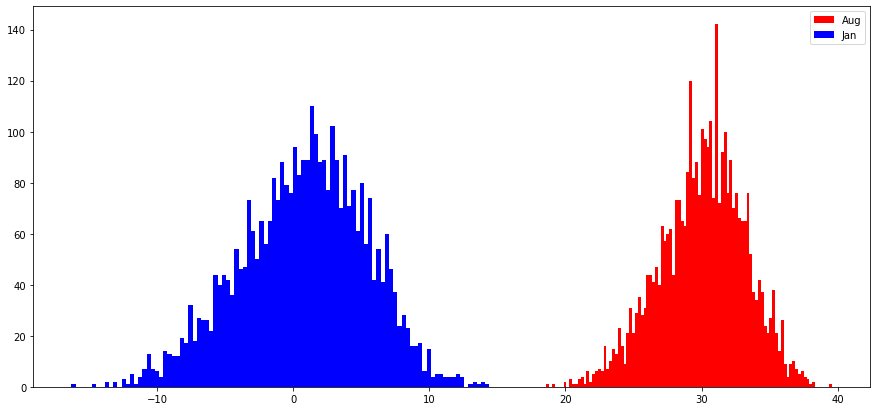

In [33]:
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

aug = []  
jan = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))
            
plt.figure(figsize=(15,7))
plt.hist(aug, bins=100, color='r', label = 'Aug')
plt.hist(jan, bins=100, color='b', label = 'Jan')
plt.legend()
plt.show()

### 기온 데이터를 상자 그림으로 표현하기

상자그림은 자료에서 얻어낸 최딧값, 최솟값, 상위 1/4, 2/4(중앙), 3/4에 위치한 값을 보여주는 그래프이다. boxplot() 함수로 만들 수 있다.

[36, 103, 113, 137, 146, 149, 156, 301, 348, 462, 541, 648, 896]


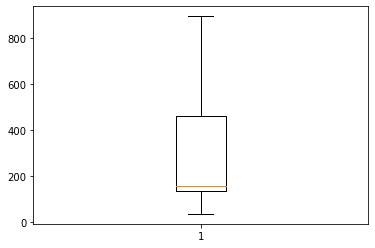

In [34]:
result = []
for i in range(13):
    result.append(random.randint(1,1000))
    
print(sorted(result))

plt.boxplot(result)
plt.show()

result 라는 리스트의 저장된 숫자들이 상자 그림에 표현된 것을 확인할 수 있다.

### 만약 1/4, 2/4, 3/4에 위치한 정확한 값이 알고 싶다면?

In [35]:
import numpy as np

In [36]:
result = np.array(result)

print("1/4: "+str(np.percentile(result,25)))
print("2/4: "+str(np.percentile(result,50)))
print("3/4: "+str(np.percentile(result,75)))

1/4: 137.0
2/4: 156.0
3/4: 462.0


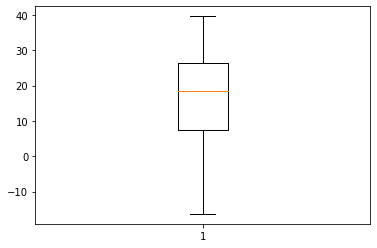

In [39]:
# 서울의 최고 기온 데이터를 상자 그림으로 그리기
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

result=[]

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))
        
plt.boxplot(result) # 상자 그림으로 나타내기
plt.show()

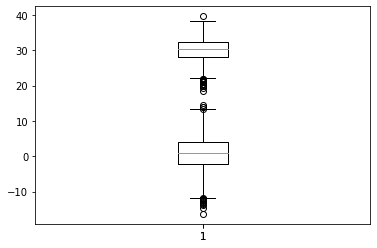

In [41]:
# 1월과 8월의 상자 그림 그리기
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)


aug = [] # 8월 최고 기온 값을 저장할 aug 리스트 생성
jan = [] # 1월 최고 기온 값을 저장할 jan 리스트 생성

for row in data:
    month = row[0].split('-')[1] # -로 구분된 값 중 2번쨰 값을 month에 저장
    if row[-1] != '':
        if month == '08': # 8월이라면
            aug.append(float(row[-1])) # aug 리스트에 최고 기온 값 추가
        if month == '01': # 1월이라면
            jan.append(float(row[-1])) # jan 리스트에 최고 기온 값 추가
            
plt.boxplot(aug)
plt.boxplot(jan)
plt.show()

상자 그림의 위, 아래에 그려진 동그라미:  __이상치(outlier)__값을 표현

다른 수치에 비해 너무 크거나 작은 값을 자동으로 나타낸다

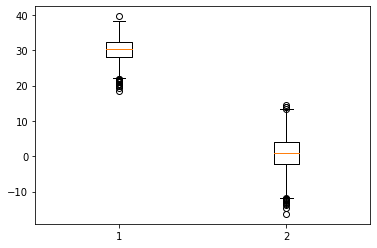

In [42]:
# 8월의 최고 기온 데이터와 1월의 최고 기온 데이터를 원소로 하는 리스트를 boxplot() 함수로 표현
plt.boxplot([aug, jan])
plt.show()

8월의 최고 기온 데이터를 표현한 상자 그림과 1월의 최고 기온 데이터를 표현한 상자 그림이 분리되어 표현

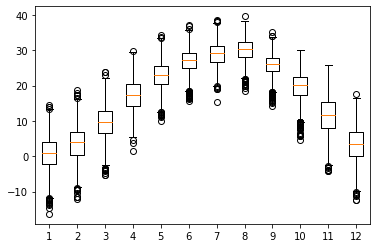

In [43]:
# 데이터를 월별로 분류해 저장한다.
# 월별 데이터를 상자 그림으로 그린다.

f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

# 월별 데이터를 저장할 리스트 month 생성(12개)
month = [[],[],[],[],[],[],[],[],[],[],[],[]]

for row in data:
    if row[-1] != '':
        # 월과 같은 번호의 인덱스에 월별 데이터 저장(예:1월->month[0])
        month[int(row[0].split('-')[1])-1].append(float(row[-1]))
        
plt.boxplot(month)
plt.show()

- 먼저 1월부터 12월 까지의 데이터 분류를 위해 빈 리스트를 12개 만든다.
- 날짜에서 추출한 월별 데이터를 정수로 변환한 1 ~ 12 사이의 수자에서 1을 뺀 값, 즉 0 ~ 11까지의 인덱스 값에 월별 데이터를 저장한다.(여기서 1을 빼는 이유는 0번 인덱스에 1월의 데이터를 저장하고, 11번 인덱스에는 12월 데이터를 저장하기 때문)

### 8월 일별 기온 데이터를 상자 그림으로 표현하기

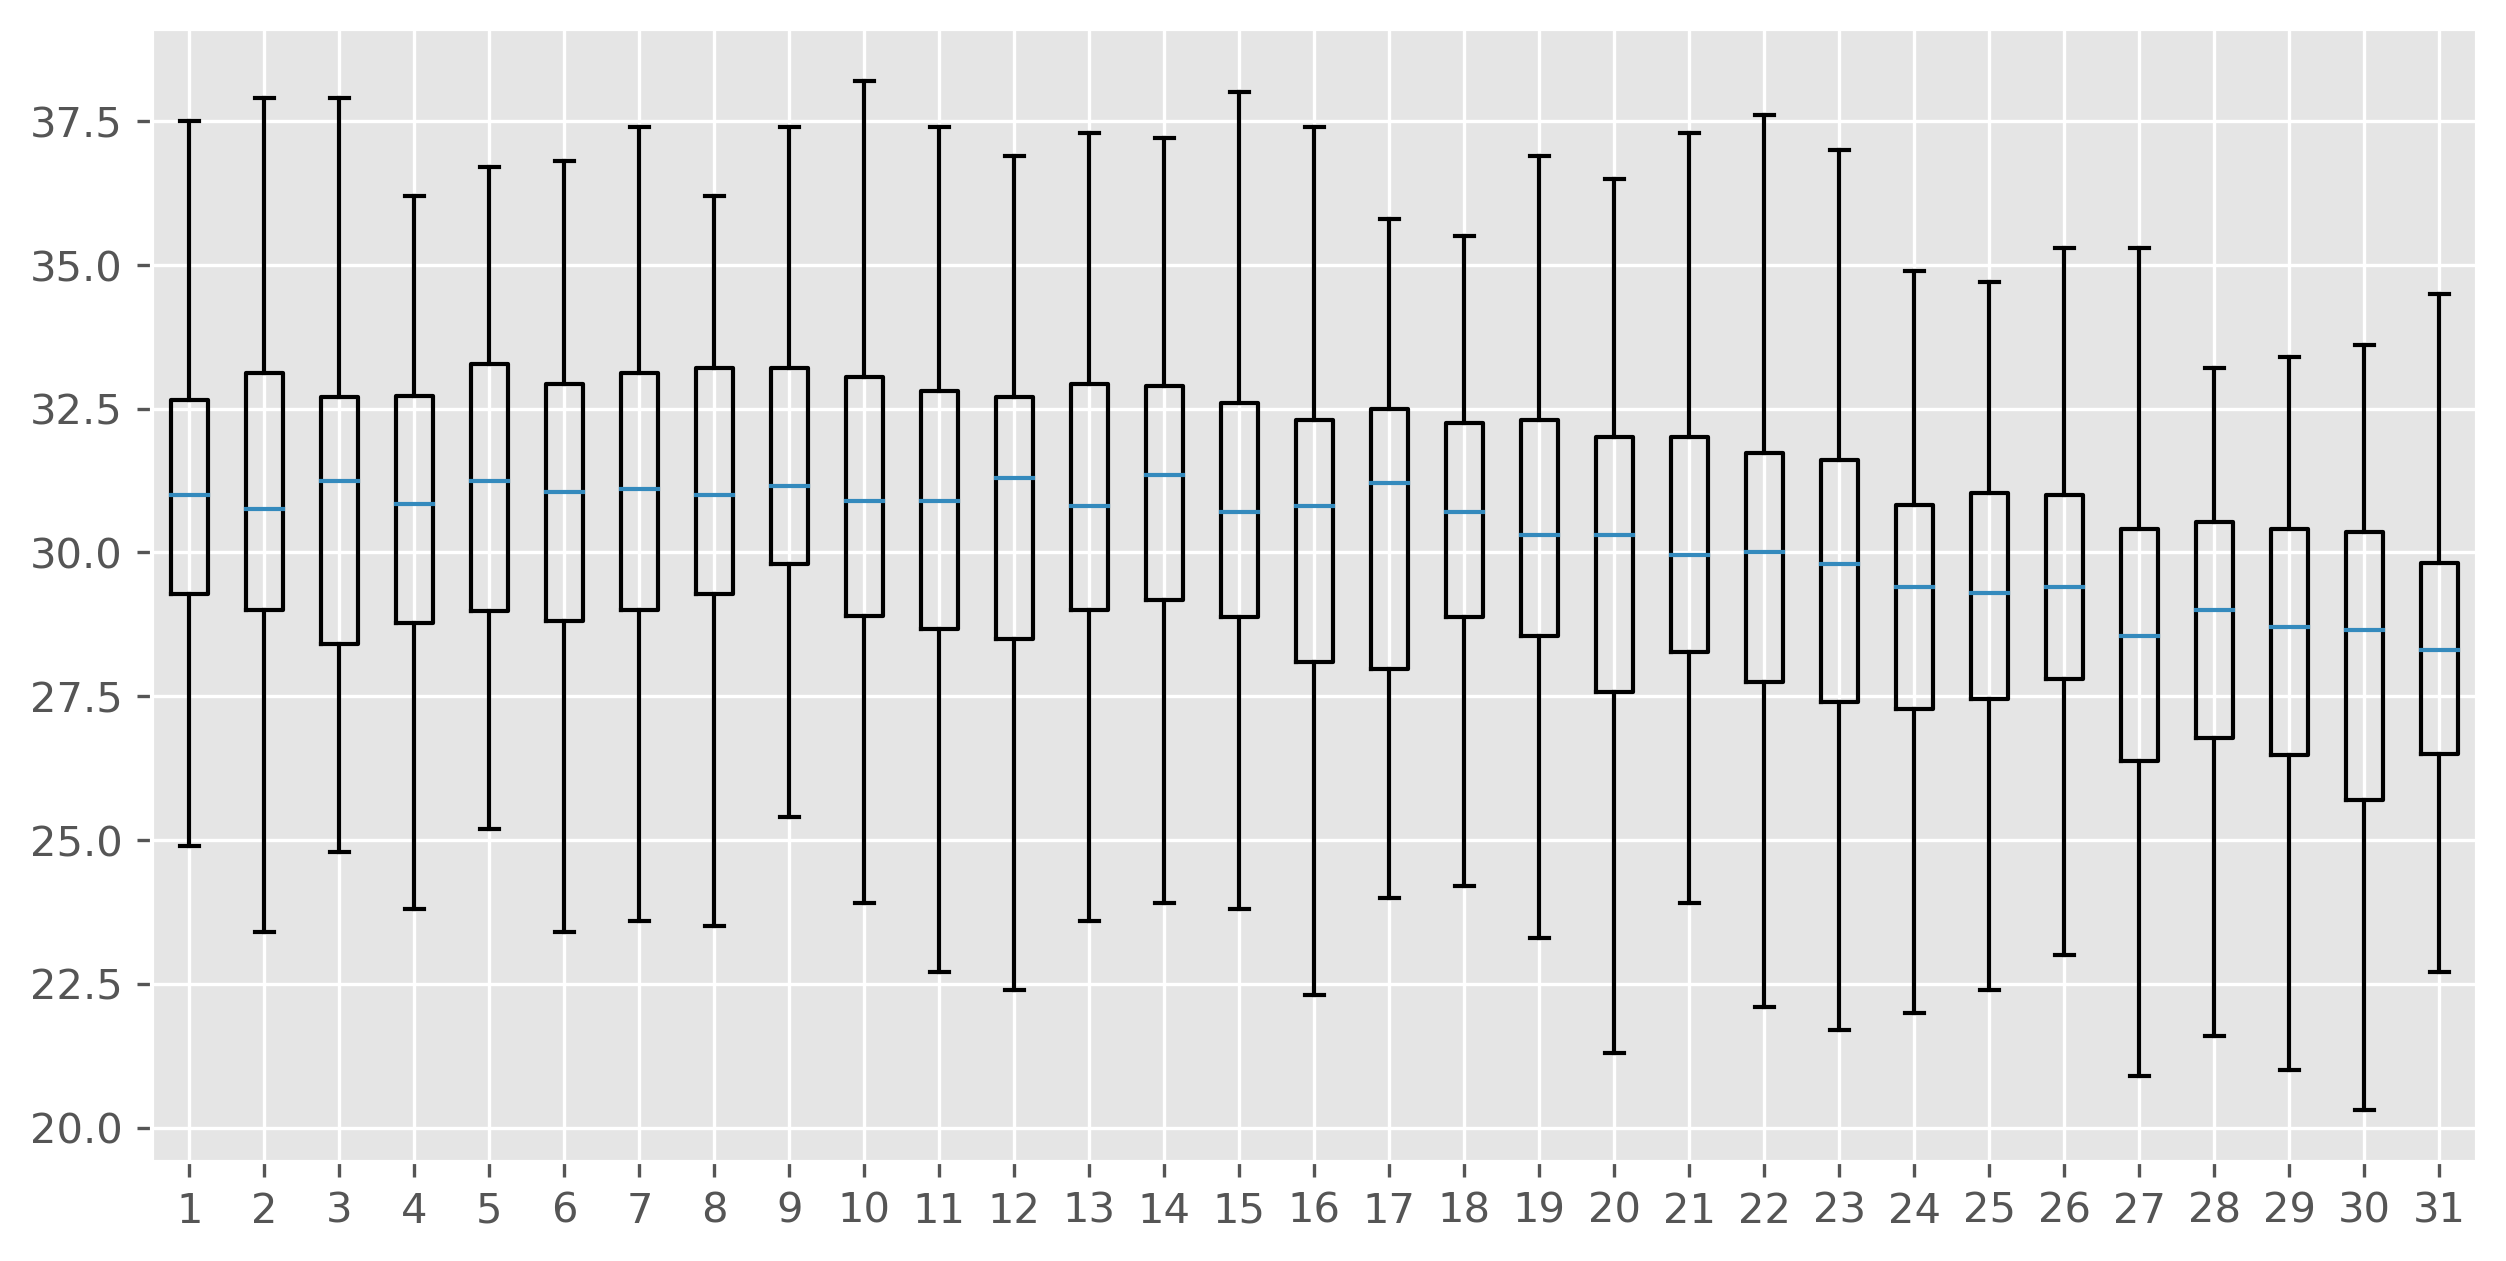

In [44]:
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

day =[] #1. 일별데이터를 저장할 리스트 day 생성
for i in range(31):
    day.append([]) # 2. day 리스트 내 31개 리스트 생성
    
for row in data:
    if row[-1] != '':
        if row[0].split('-')[1] =='08': # 8월이라면
            # 최고 기온 값 저장
            day[int(row[0].split('-')[2])-1].append(float(row[-1]))
            
plt.style.use('ggplot') # 3. 그래프 스타일 지정
plt.figure(figsize=(10,5), dpi=300) # 4. 그래프 크기 수정
plt.boxplot(day, showfliers=False) # 5. 아웃라이어 값 생략

plt.show()

- 1에서 일별 데이터를 저장할 리스트 day를 만들고,
- 2에서 day라는 리스트 안에 31개의 리스트를 추가했다.
- 3에서 plt.style.use('ggplot')라는 코드를 사용해서 ggplot 스타일로 지정했다.
- 4에서 그래프의 크기를 가로 10, 세로 5로 지정했다.
- 5에서 showfliers=False는 이상치를 표시하는 동그라미가 보이지 않게 하는 코드이다.